<a href="https://colab.research.google.com/github/Deepanshu-Pal7701/Predicting-Traffic-Volume/blob/main/ESE_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle




📈 Model Evaluation Metrics:
Mean Absolute Error: 7.01
R² Score: 1.0


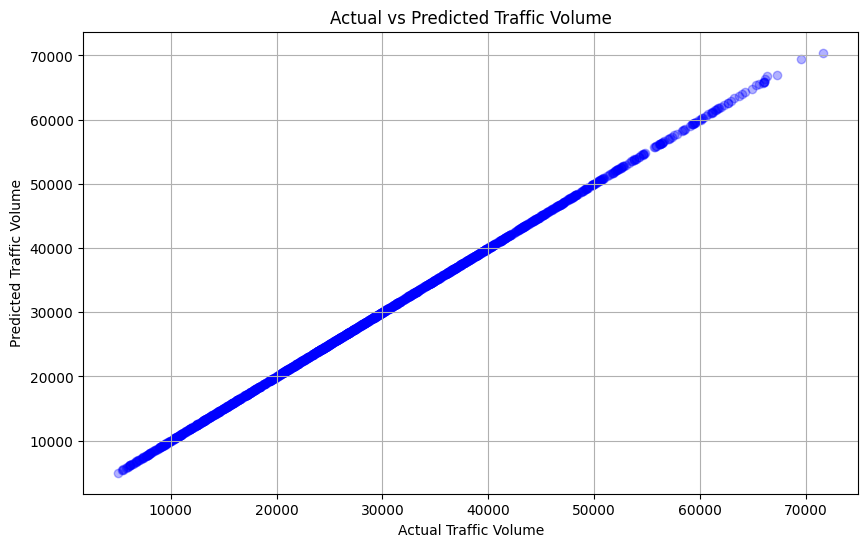

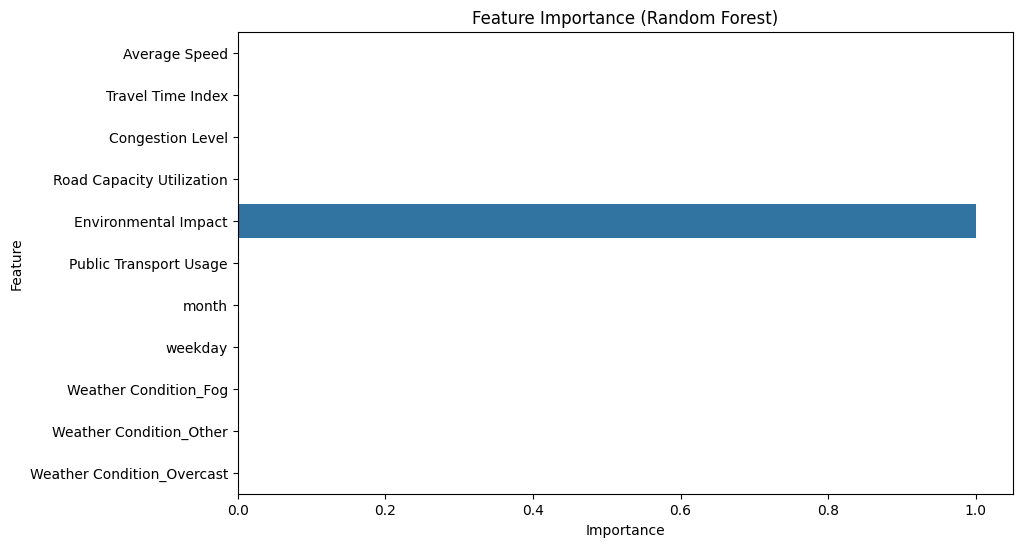


Enter an area name (e.g., Koramangala, Whitefield, M.G. Road): whitefield

✅ Predicted Traffic Volume for **whitefield**: 21295 vehicles
📊 Actual Average Volume in data: 21295 vehicles

📋 Sample traffic and weather data for this area:

      Date  Area Name  Traffic Volume  Environmental Impact  Public Transport Usage  Weather Condition_Fog  Weather Condition_Other  Weather Condition_Overcast
2022-01-01 Whitefield            7399                64.798               44.662384                  False                    False                       False
2022-01-03 Whitefield            9154                68.308               15.845050                  False                    False                       False
2022-01-03 Whitefield           24968                99.936               70.801939                  False                     True                       False
2022-01-04 Whitefield           20450                90.900               53.546069                  False                 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import difflib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Banglore_traffic_Dataset.csv')

# Convert 'Date' to datetime and drop missing key values
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date', 'Traffic Volume', 'Area Name'], inplace=True)

# Extract time-based features
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday

# Simplify weather condition into a single column with main types
df['Weather Condition'] = df['Weather Conditions'].str.lower().map(
    lambda x: 'Clear' if 'clear' in x else
              'Fog' if 'fog' in x else
              'Overcast' if 'overcast' in x else 'Other'
)

# One-hot encode simplified weather condition
df = pd.get_dummies(df, columns=['Weather Condition'], drop_first=True)

# Define features and target
base_features = [
    'Average Speed', 'Travel Time Index', 'Congestion Level',
    'Road Capacity Utilization', 'Environmental Impact',
    'Public Transport Usage', 'month', 'weekday'
]
weather_features = [col for col in df.columns if col.startswith('Weather Condition_')]
features = base_features + weather_features
target = 'Traffic Volume'

# Drop missing data for model training
df = df[features + ['Area Name', 'Date', target]].dropna()

# Split and scale data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print("\n📈 Model Evaluation Metrics:")
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred), 2))
print("R² Score:", round(r2_score(y_test, y_pred), 4))

# Plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Actual vs Predicted Traffic Volume")
plt.grid(True)
plt.show()

# Plot: Feature Importance
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 🚦 Area-specific prediction
area_input = input("\nEnter an area name (e.g., Koramangala, Whitefield, M.G. Road): ").strip()
area_df = df[df['Area Name'].str.lower() == area_input.lower()]

if area_df.empty:
    print(f"\n❌ No data found for area: '{area_input}'.")

    # Suggest close matches
    possible_areas = df['Area Name'].dropna().unique()
    close_matches = difflib.get_close_matches(area_input, possible_areas, n=3, cutoff=0.5)
    if close_matches:
        print("❓ Did you mean:", ", ".join(close_matches))
else:
    # Predict traffic volume
    area_features = area_df[features].mean().values.reshape(1, -1)
    area_features_scaled = scaler.transform(area_features)
    predicted_volume = model.predict(area_features_scaled)[0]

    print(f"\n✅ Predicted Traffic Volume for **{area_input}**: {int(predicted_volume)} vehicles")
    actual_avg = area_df['Traffic Volume'].mean()
    print(f"📊 Actual Average Volume in data: {int(actual_avg)} vehicles")

    # Show sample data for area
    print("\n📋 Sample traffic and weather data for this area:\n")
    display_columns = ['Date', 'Area Name', 'Traffic Volume', 'Environmental Impact',
                       'Public Transport Usage'] + weather_features
    print(area_df[display_columns].head(10).to_string(index=False))


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
